# Teoría Regresión Logística

La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado para la clasificación, no para la regresión, a pesar de su nombre. Se utiliza para predecir la probabilidad de que una observación pertenezca a una de dos clases (clasificación binaria) o a varias clases (clasificación multiclase).

**Explicación del Algoritmo de Regresión Logística:**

1. **Hipótesis Logística:** La base de la Regresión Logística es la hipótesis logística, que se utiliza para modelar la probabilidad de que una observación pertenezca a una clase. La hipótesis logística es una función sigmoide que transforma una combinación lineal de características en un valor entre 0 y 1:

   ```
   P(Y=1|X) = 1 / (1 + e^(-z))
   ```

   Donde:
   - `P(Y=1|X)` es la probabilidad de que la observación pertenezca a la clase 1.
   - `X` representa las características de la observación.
   - `z` es una combinación lineal de las características y los coeficientes del modelo.

2. **Entrenamiento:** El entrenamiento del modelo implica ajustar los coeficientes (o pesos) del modelo para que se ajusten a los datos de entrenamiento. Esto se hace mediante un proceso de optimización, como el descenso de gradiente, que busca minimizar una función de costo.

3. **Función de Costo:** La función de costo en Regresión Logística se utiliza para evaluar cuán bien el modelo se ajusta a los datos de entrenamiento. La función de costo comúnmente utilizada es la Entropía Cruzada (Cross-Entropy Loss) o la Log Loss. El objetivo es minimizar esta función para obtener los mejores coeficientes del modelo.

4. **Predicciones:** Una vez que el modelo está entrenado, se puede utilizar para hacer predicciones. Dado un conjunto de características para una observación, se utiliza la hipótesis logística para calcular la probabilidad de que pertenezca a la clase 1. Si esta probabilidad es mayor que un umbral (generalmente 0.5), se clasifica como clase 1; de lo contrario, se clasifica como clase 0 en un problema de clasificación binaria.

**Imágenes Ilustrativas:**

1. **Sigmoide (Función de Hipótesis):** Puedes mostrar una gráfica de la función sigmoide para ilustrar cómo transforma la combinación lineal de características en una probabilidad entre 0 y 1. Esta imagen ayudará a comprender la hipótesis logística.

  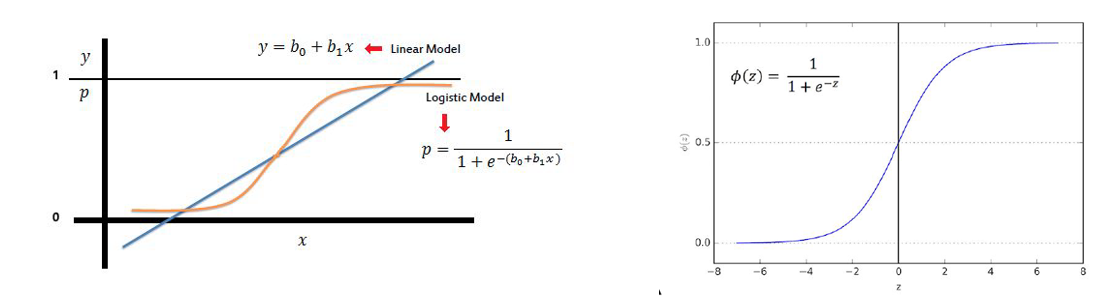

2. **Optimización (Descenso de Gradiente):** Puedes mostrar una imagen que represente el proceso de optimización, como el descenso de gradiente, que ajusta los coeficientes del modelo para minimizar la función de costo. Esto ayuda a visualizar cómo el modelo se entrena.

   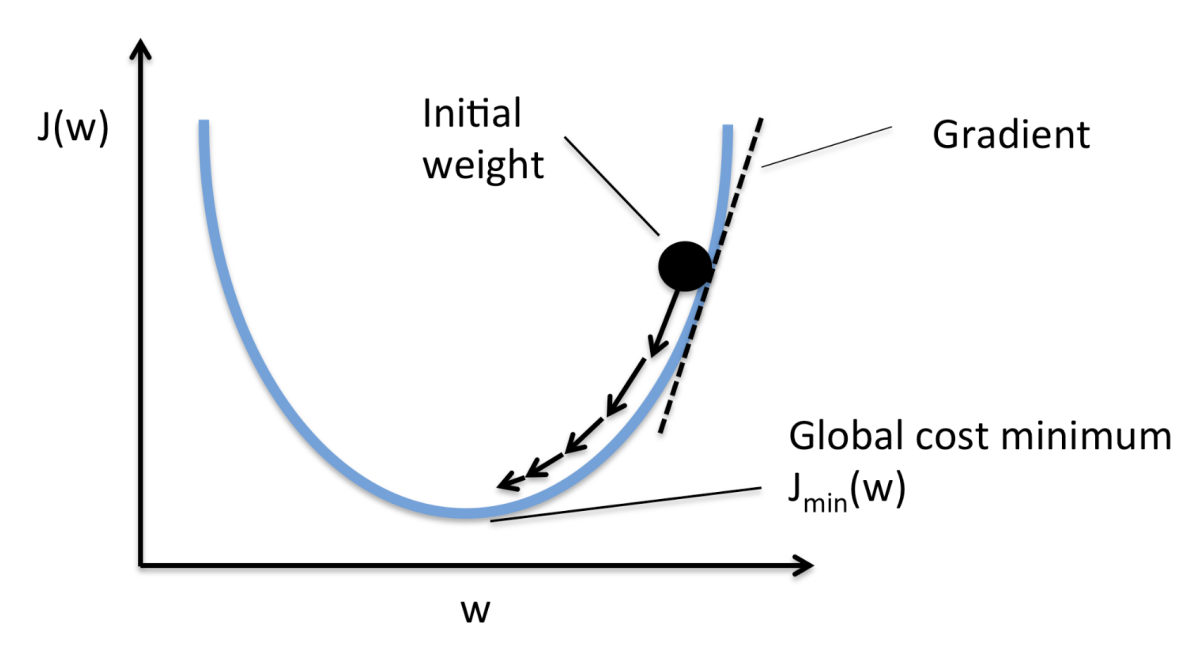

3. **Clasificación de Datos:** Puedes proporcionar un ejemplo de cómo se clasifican los datos en función de las probabilidades calculadas por el modelo, utilizando un umbral para la decisión. Esto ilustrará el proceso de clasificación.

   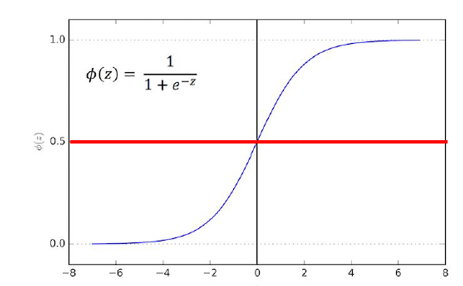

# Regresión Logística con Python

En esta clase utilizaremos [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). Este es un famoso conjunto de datos y muy a menudo es el primer paso de un estudiante en el Machine Learning.

Intentaremos predecir una clasificación: supervivencia o fallecimiento.
Comencemos nuestra comprensión de la implementación de regresión logística en Python para la clasificación.

Usaremos una versión "semi-limpia" del conjunto de datos Titanic, si usa el conjunto de datos alojado directamente en Kaggle, es posible que deba hacer una limpieza adicional que no se muestra en este Notebook.

Descripción del DataSet:

- PassengerId: Identificación de pasajeros
- Pclass: Clase del pasajero (1 = 1era; 2 = 2da; 3 = 3ra)
- Survived: Sobrevivio (0 = No; 1 = Si)
- name: Nombre pasajero
- sex: Sexo del pasajero
- age: Edad
- sibsp: Numero de hermanos/esposa abordo
- parch: Numero de familiares/hijos abordo
- ticket: Número de Ticket
- fare: Tarifa de pasaje (Libra esterlina)
- cabin: Cabina
- embarked: Puerto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importar librerías
¡Vamos a importar algunas librerías para empezar!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Los Datos

Comencemos leyendo en el archivo titanic_train.csv con pandas.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Análisis exploratorio de datos

¡Comencemos un análisis de datos exploratorio! ¡Comenzaremos revisando los datos faltantes!

## Datos faltantes

Hagamos algunas exploraciones para identificar datos faltantes

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

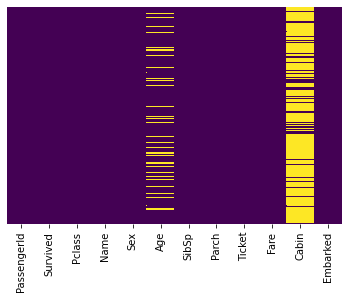

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Falta aproximadamente el 20 por ciento de los datos de Edad. La proporción de edad que falta es probablemente lo suficientemente pequeña como para reemplazarla razonablemente con alguna forma de imputación. En cuanto a la columna Cabina, parece que nos faltan demasiados datos para hacer algo útil en un nivel básico. Probablemente eliminaremos esto más adelante o lo cambiaremos a otra función como "Cabina conocida: 1 o 0".

¡Continuemos visualizando algunos datos más!

<AxesSubplot:xlabel='Survived', ylabel='count'>

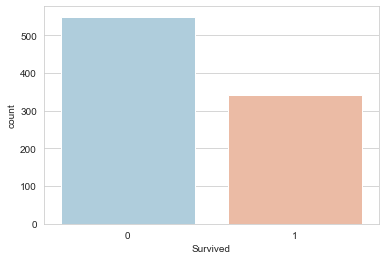

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

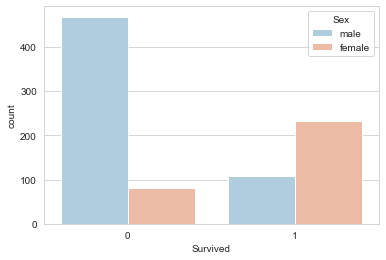

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

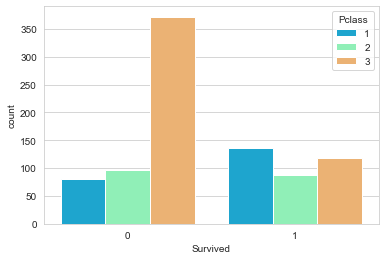

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Count'>

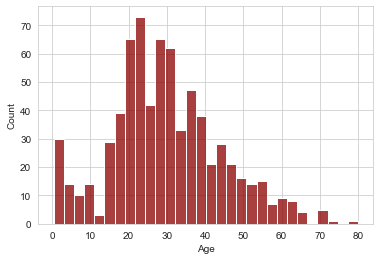

In [10]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:>

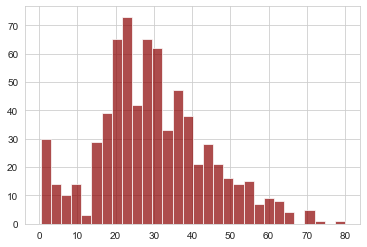

In [11]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

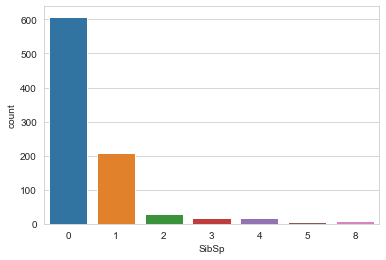

In [12]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

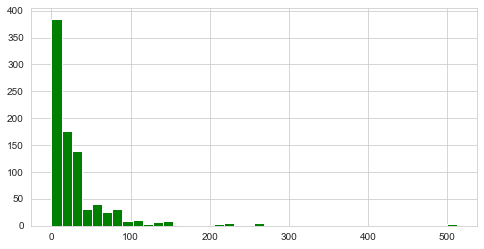

In [13]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Limpieza de datos
Queremos completar los datos de edad que faltan en lugar de simplemente eliminar las filas de datos de edad que faltan. Una forma de hacerlo es completando los datos faltantes con la edad media de todos los pasajeros (imputación).
Sin embargo, podemos ser más inteligentes al respecto y verificar la edad promedio por clase de pasajero. Por ejemplo:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

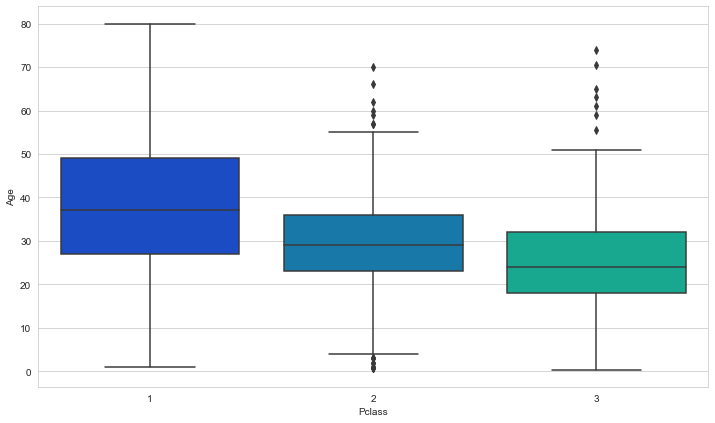

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Podemos ver que los pasajeros más ricos de las clases más altas tienden a ser mayores, lo cual tiene sentido. Usaremos estos valores de edad promedio para imputar según Pclass for Age.

In [15]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
pd.isnull(train['Age'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

¡Ahora aplica esa función!

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

¡Ahora revisemos ese mapa de calor nuevamente!

<AxesSubplot:>

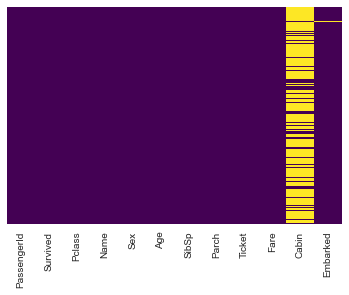

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

¡Excelente! Sigamos adelante y eliminemos la columna Cabina y la fila en Embarcado que es NaN.

In [21]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True) #elimina las filas que tienen NaN, en este caso el NaN de Embarked

¡Excelente! ¡Nuestros datos están listos para nuestro modelo!

# Construyendo un modelo de regresión logística

Comencemos dividiendo nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (hay otro archivo test.csv con el que puedes jugar en caso de que quieras usar todos estos datos para el entrenamiento).

## División de prueba de entreamiento

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = train.drop(['Survived','Name','Ticket','PassengerId'],axis=1)
y = train['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Preprocesamiento de datos

In [27]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [28]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [29]:
# Instanciar el escalador estándar y el codificador one hot
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [30]:
# Hacer tuplas para preprocesar las columnas categóricas y numéricas
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [31]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [32]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027572379A30>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027572379A90>)])

In [33]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [34]:
variables = []

for x in list(col_transformer.get_feature_names_out()):
    x_ = x.replace('standardscaler__','').replace('onehotencoder__','')
    variables.append(x_)

In [35]:
X_train_df = pd.DataFrame(X_train_processed, columns = variables)
X_test_df = pd.DataFrame(X_test_processed, columns = variables)
X_train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.825812,-0.859480,-0.484080,-0.466368,-0.481863,1.0,0.0,0.0,0.0,1.0
1,-0.363204,-0.859480,-0.484080,0.768019,-0.184331,1.0,0.0,0.0,0.0,1.0
2,0.825812,-0.238330,-0.484080,-0.466368,-0.478932,1.0,0.0,0.0,0.0,1.0
3,-1.552221,0.149889,0.439533,-0.466368,0.480109,0.0,1.0,0.0,0.0,1.0
4,0.825812,-0.393618,-0.484080,-0.466368,-0.482352,0.0,1.0,0.0,1.0,0.0


## Entrenamiento y predicción

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train_df,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test_df)

¡Pasemos a evaluar nuestro modelo!

## Evaluación

¡Podemos verificar la precisión, recall y la puntuación f1 utilizando el reporte de clasificación!

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 33  71]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



¡Nada mal! Es posible que desees explorar otra ingeniería de variables y el otro archivo titanic_text.csv, algunas sugerencias para la ingeniería de variables:

* Intente tomar el título (Dr., Sr., Sra., Etc.) del nombre como característica
* Quizás la letra de la cabina podría ser una característica
* ¿Hay alguna información que se pueda obtener del boleto?

## Buen trabajo